In [79]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

url = '/Users/apple/Desktop/fin.csv'

fin= pd.read_csv(url)
fin.head()

,web-scraper-order,web-scraper-start-url,title,title-href,news
0,1589216177-253,https://financialnews.com/,NaN,https://financialnews.com/news/9-successful-companies-created-during-an-economic-crisis/,"Today Hyatt Hotels Corporation is valued at $5.6 billion. As of 2019, the chain has 913 hotels i..."
1,1589216222-334,https://financialnews.com/,NaN,https://financialnews.com/news/crypto/bitcoin-price-crashes-below-9000-ahead-of-halving/,"According to Rek.to, the volume of liquidations on the popular BitMEX crypto-derivative exchange..."
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now."
4,1589216222-331,https://financialnews.com/,NaN,https://financialnews.com/news/crypto/bitcoin-price-crashes-below-9000-ahead-of-halving/,"Today, May 10, the price of the first cryptocurrency suddenly fell below $9,000, breaking the up..."


In [80]:
# Standard libraries for data frames, arrays, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import seaborn as sns
sns.set(style="white")
%matplotlib inline

# Import Scikit Learn for preprocessing tools and algorithms
import sklearn

# Import library for setting dates
import datetime as dt

# Import library for reading pdf files
import PyPDF2

# Import wordclouds for visualizing topics
import wordcloud

# Import gensim library for calculating coherence measures
import gensim

# Import natural language package to remove stopwords and lemmatize terms
import nltk

# Import digits module to filter out numbers
#import re
import string

# Import statsmodels for statistical analysis
import statsmodels

In [81]:
# Import tools to tokenize, remove stopwords, and lemmatize (or stem) words
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords') # download collection of stopwords from NLTK
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
nltk.download('wordnet') # download wordnet dictionary of lemmas
from nltk.stem import WordNetLemmatizer
from string import digits

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
fin.isnull().sum()

web-scraper-order          0
web-scraper-start-url      0
title                    120
title-href                 0
news                       1
dtype: int64

In [83]:
fin=fin.dropna()
# or it will return error as "float"(nan is float)

In [84]:
# Amount of words in each news

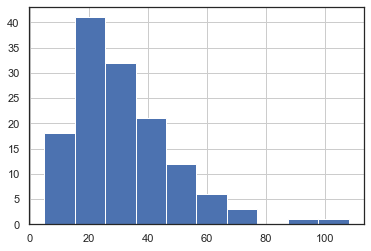

In [85]:
def get_words_per_doc(txt):
    # split text into words and count them.
    return len(txt.split()) 

# apply to our data
fin['num_words'] = fin['news'].apply(get_words_per_doc)
fin['num_words'].hist()


In [86]:
fin.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,news,num_words
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...,21
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now.",12


In [87]:

fin['count_chara']=fin['news'].str.len()


In [88]:
fin.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,news,num_words,count_chara
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...,21,119
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now.",12,63


In [89]:
fin['avg_words']=fin['count_chara']/fin['num_words']
fin.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,news,num_words,count_chara,avg_words
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...,21,119,5.666667
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now.",12,63,5.250000


In [90]:
# remove stopwords
from nltk.corpus import stopwords
stop=stopwords.words('english')

from nltk.corpus import stopwords
fin['no_stop']=fin['news'].apply(lambda sen:" ".join(x for x in sen.split() if x not in stop))
fin.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,news,num_words,count_chara,avg_words,no_stop
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...,21,119,5.666667,"The loans provided small businesses forgiven funds used pay employees, rent mortgage."
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now.",12,63,5.250000,"This happened January, Beck found now."


In [91]:
#lemmatize

from textblob import Word
fin['no_stop']=fin['no_stop'].apply(lambda x: " ".join([Word(word).lemmatize()for word in x.split()]))
fin.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,news,num_words,count_chara,avg_words,no_stop
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...,21,119,5.666667,"The loan provided small business forgiven fund used pay employees, rent mortgage."
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now.",12,63,5.250000,"This happened January, Beck found now."


In [92]:
# Lowercase
fin['no_stop']=fin['no_stop'].apply(lambda sen:" ".join(x.lower() for x in sen.split()))
fin.head(2)

,web-scraper-order,web-scraper-start-url,title,title-href,news,num_words,count_chara,avg_words,no_stop
2,1589216135-189,https://financialnews.com/,Small Business Loan Program Reaches 350 Billion Limit,https://financialnews.com/news/small-business-loan-program-runs-out/,The loans provided to these small businesses will be forgiven if the funds are used to pay emplo...,21,119,5.666667,"the loan provided small business forgiven fund used pay employees, rent mortgage."
3,1589216123-166,https://financialnews.com/,Craig Wright withdraws lawsuit against Adam Back,https://financialnews.com/news/crypto/craig-wright-withdraws-lawsuit-against-adam-back/,"This happened in January, but Beck found out about it just now.",12,63,5.250000,"this happened january, beck found now."


In [93]:
#remove the digit

In [94]:
# common words and rare words

In [95]:
freq=pd.Series(' '.join(fin['no_stop']).split()).value_counts()[:10]
freq

the          47
business     17
in           17
north        16
china        16
according    16
us           14
may          13
loan         13
also         13
dtype: int64

In [96]:
freq=pd.Series(' '.join(fin['no_stop']).split()).value_counts()[-10:]
freq

67.3%          1
$200-500       1
thousand       1
coherent       1
belousov.      1
“i             1
businesses.    1
abnormal       1
january,       1
february       1
dtype: int64

## Feature Extraction

In [97]:
news=fin['no_stop']

In [98]:
# semantic relationship
# antonymy(raise-lower); hypernymy(dog-puppy)-- reverse hyponymy


In [99]:
# Import NMF from Scikit Learn and 
from sklearn.decomposition import NMF
from sklearn import metrics

import gensim
from sklearn.feature_extraction.text import CountVectorizer

## LDA(Latent Dirichlet Allcation) topic modelling

In [101]:
vect = CountVectorizer(min_df=2, max_df=0.2) 
# ignore terms that appear more then .. OR less than 

X = vect.fit_transform(news)

# Convert sparse matrix to gensim corpus.
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)

# Mapping from word IDs to words (To be used in LdaModel's id2word parameter)
id_map = dict((v, k) for k, v in vect.vocabulary_.items())


In [108]:
ldamodel= gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=id_map, passes=25, random_state=34)

In [109]:
ldamodel

In [110]:
print(list(ldamodel.show_topics()))

[(0, '0.023*"china" + 0.017*"in" + 0.016*"number" + 0.016*"fell" + 0.014*"according" + 0.014*"production" + 0.014*"benefit" + 0.014*"still" + 0.013*"april" + 0.012*"million"'), (1, '0.017*"business" + 0.016*"coronavirus" + 0.012*"loan" + 0.012*"program" + 0.012*"spread" + 0.011*"in" + 0.011*"economy" + 0.010*"billion" + 0.010*"region" + 0.010*"wright"'), (2, '0.016*"minister" + 0.013*"new" + 0.013*"infection" + 0.013*"province" + 0.013*"one" + 0.013*"kim" + 0.012*"prime" + 0.011*"11" + 0.011*"jong" + 0.011*"case"'), (3, '0.015*"level" + 0.015*"business" + 0.011*"record" + 0.011*"north" + 0.011*"according" + 0.011*"led" + 0.011*"coronavirus" + 0.011*"us" + 0.009*"it" + 0.009*"state"'), (4, '0.021*"year" + 0.016*"minister" + 0.015*"prime" + 0.013*"report" + 0.013*"loan" + 0.013*"rate" + 0.011*"19" + 0.011*"covid" + 0.010*"north" + 0.010*"billion"')]


## tf-idf

In [116]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.001, 
                        max_df=0.9,  
                        max_features=20,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(news)

In [117]:
news.value_counts()

the prime minister instructed assistant schedule meeting minister cabinet next week. the politician return work critical time country quarantined month. ministers hope johnson give new impetus plan formulate strategy overcoming crisis. after treatment covid, prime minister discharged london hospital continues isolated suburban residence. johnson hospitalized exacerbating symptom covid-19 spent three night intensive care. johnson said earlier owes life national health service.    1
recall recently, wright threatened new lawsuit, time miner operator lightning network nodes.                                                                                                                                                                                                                                                                                                                                                                                                        1
the number new jobless claim

In [118]:
vocab = tfidf.get_feature_names()
vocab 

['according',
 'billion',
 'business',
 'china',
 'coronavirus',
 'covid',
 'jong',
 'kim',
 'level',
 'loan',
 'million',
 'minister',
 'new',
 'north',
 'prime',
 'prime minister',
 'program',
 'state',
 'week',
 'year']

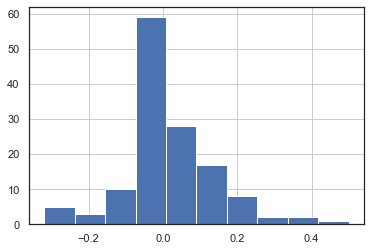

In [120]:
from textblob import TextBlob
fin['sentiment'] = fin['no_stop'].apply(lambda x: TextBlob(x).sentiment[0] )
fin['sentiment'].hist()